# Instruções gerais

Para executar uma CÉLULA, pressione o botão "Run" no topo, com a CÉLULA selecionada, ou pressione:
    
    Shift + Enter

EXECUTE APENAS UMA CÉLULA POR VEZ

-Caso deseje apagar a saída de uma célula carregada, mas não deseje carregar uma nova saída, vá à aba superior, escolha o ícone
do teclado (open the command palette/ jupyter-notebook command group) e selecione clear cell output.

@author: Marco César Prado Soares, MSc.
Especialista Lean Six Sigma Master Black Belt, Eng. Químico, MSc. Eng. Mecatrônica (instrumentação) 
Marco.Soares@br.ey.com; marcosoares.feq@gmail.com

# Regressão Logística
## Problema Classificatório
### Template 3: Online Sales - News Subscription

Muitas situações apresentam como resultado uma probabilidade. Por exemplo, um determinado evento pode ou não ocorrer (a resposta é binária). Estes problemas envolvem uma série de situações práticas do dia-a-dia, e são fundamentais na análise de riscos. Eles são chamados problemas classificatórios ou problemas de classificação.

A regressão logística pertence a uma classe maior de algoritmos de Machine Learning chamada de modelos lineares.
(https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression%202/9)

Por fim, para concluir este módulo de Machine Learning, veremos uma situação de aplicação prática em Marketing/Vendas digitais. Um jornal disponibiliza conteúdo gratuito em sua página para os usuários que se registram no site, e conteúdo exclusivo para assinantes. A partir das informações de cadastro dos visitantes, o jornal construiu sua base de dados da seguinte forma:

•	Identificador do leitor que se cadastra (simplesmente a posição em que ele foi inserido na base, a partir da primeira linha). Não acrescenta informação para a análise classificatória (inclusive por ser sempre crescente), e é equivalente ao índice de entrada;
•	A idade do leitor, dividida em grupos etários identificados por strings (textos);
•	A média semanal de páginas lidas pelo indivíduo;
•	A quantidade de anúncios recebidos e visualizados pelo leitor a cada semana. 

Assim, dadas estas 3 variáveis preditoras (idade, média semanal de páginas lidas, e quantidade de anúncios recebidos), desejamos saber qual a resposta binária Y mais provável: 

- Y = 0 : o leitor não assinou o conteúdo exclusivo;
- Y = 1 : o leitor assinou o conteúdo exclusivo.

Os grupos etários são os seguintes (em anos):

- 18-24
- 25-29
- 30-39
- 40-49
- 50-59
- 60+

Repare que aqui podemos, além de avaliar se o leitor assinará ou não (resposta fundamental da regressão logística), utilizar o cálculo de probabilidade para calcular um escore (probabilidade de ele assinar), estabelecendo uma escala de prioridade a respeito de em quais clientes focar os esforços para adquirir assinaturas. 

Assim, dada a probabilidade associada à regressão logística para cada cliente, podemos dividir o cliente em vários grupos de prioridade. Para cada grupo de prioridade, podemos oferecer diferentes condições: por exemplo, descontos, bônus ou condições especiais que convençam a realização de assinatura.

Desta forma, evitamos o critério binário de simplesmente abordar ou não o cliente (que aborda indiscriminadamente as pessoas com 50% de chances de assinarem, por exemplo; e que faz com que todas as probabilidades abaixo de 50% de chances de não assinarem sejam consideradas equivalentes, quando há claras diferenças e chances maiores ou menores). Uma divisão possível, então, é:

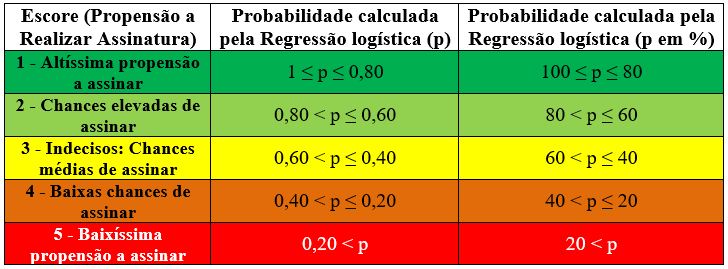

Vamos, então, utilizar a base de dados para construir um modelo que nos forneça tanto a informação a respeito de se a pessoa irá ou não assinar o serviço pago (resposta y); quanto a probabilidade associada à distribuição logística, o que nos permitirá aplicar o critério da tabela de escore, encontrando a propensão do leitor a realizar a assinatura. 

- Pergunta 1: uma pessoa com o seguinte perfil se cadastrou para ter acesso ao conteúdo gratuito do jornal. Verifique se a pessoa se tornará ou não assinante do serviço pago, e classifique ela na tabela de escore de propensão a realizar a assinatura.

- Idade: 22 anos;
- Média semanal de páginas lidas: 67,21 páginas;
- Quantidade de anúncios recebidos e visualizados: 59 anúncios.

- Pergunta 2: analisando os coeficientes da regressão logística, quais variáveis preditoras parecem ser mais determinantes para se a se tornará ou não assinante do serviço pago (ou, de outra forma, quais coeficientes aparentam ser mais dominantes)?

In [ ]:
#Carregar as bibliotecas e o dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
#Step 1. Import the model you want to use
#In sklearn, all machine learning models are implemented as Python classes
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.special import expit

caminho = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 1 - Regressão Logística\Reg.log.3 - online sales - news subscription\subscription_data.xlsx"
dataset = pd.read_excel(caminho)

In [ ]:
"""Outra questão importante na etapa de limpeza e preparação dos dados 
é a necessidade de eliminar linhas com entradas nulas, as quais impediriam a 
construção do modelo de Machine Learning. Para isso:"""

#It is important to clean the dataset before analyzing it, eliminating
#possible null entries - the Machine Learning model cannot work with such
#null values
dataset = dataset.dropna(axis=0)

# NOTA: 

Caso houvesse colunas em particular com várias entradas nulas, sendo que essas colunas não são realmente relevantes para o modelo que se deseja construir, o ideal seria: selecionar apenas as colunas desejadas para o modelo e, somente então, fazer a limpeza dos dados. Isto evitaria que várias linhas com informações relevantes fossem eliminadas pelo processo de limpeza (dropna). Repare que fazemos isso antes de selecionar os dataframes X e y (próxima etapa) para garantir que as mesmas entradas (linhas) de X e y sejam removidas e para que não haja discordância entre os números de entradas e índices das linhas dos dois dataframes.

Já sabemos que os modelos exigem que todas as variáveis sejam numéricas. Portanto, se tivermos uma variável binária ou classificatória, esta variável deve ser associada a uma variável numérica. Repare que temos duas variáveis numéricas e uma classificatória (grupos etários), ainda representada como texto (string). 

Assim, criaremos uma nova coluna de valores numéricos 'Grupo etario', que armazenará valores inteiros relacionados a cada uma das faixas etárias analisadas:

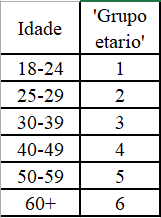

Vamos definir o dataframe X das variáveis preditoras. Lembre-se que, antes de fazer a regressão, devemos garantir que o dataframe X possua apenas dados numéricos. Para isso, fazemos a seleção das variáveis (colunas) do dataset, eliminando a coluna “Idade”, cujas entradas são strings (textos). Também definimos a variável resposta y como a coluna do dataset original que informa se a pessoa correspondente a cada entrada (cada linha) realizou ou não assinatura.

X = dataset[['Grupo etario', 'Média de páginas lidas por semana', 'Quantidade de anúncios recebidos por semana']]
#variaveis em torno das quais sera regredido o modelo

#todas as variaveis devem ser do tipo float
#agora todas as variaveis sao numericas

y = dataset['Assinou ou não (Y)']

In [ ]:
"""
Selecionar colunas para o modelo e preparar os dados
"""
#A variavel idade e uma string. Vamos criar uma variavel numerica que divida em grupos
#grupo 1: 18-24
#gp2: 25-29
#gp3: 30-39
#gp4: 40-49
#gp5: 50-59
#gp6 = 60+
dataset['Grupo etario'] = 0

total = len(dataset)
i = 0
while (i < total):
    
    if (dataset.iloc[i,1] == "18-24"):
        dataset.iloc[i,5] = 1
        
    if (dataset.iloc[i,1] == "25-29"):
        dataset.iloc[i,5] = 2
        
    if (dataset.iloc[i,1] == "30-39"):
        dataset.iloc[i,5] = 3
        
    if (dataset.iloc[i,1] == "40-49"):
        dataset.iloc[i,5] = 4
    
    if (dataset.iloc[i,1] == "50-59"):
        dataset.iloc[i,5] = 5
    
    if (dataset.iloc[i,1] == "60+"):
        dataset.iloc[i,5] = 6
    
    i = i + 1

X = dataset[['Grupo etario', 'Média de páginas lidas por semana', 'Quantidade de anúncios recebidos por semana']]
#variaveis em torno das quais sera regredido o modelo

#todas as variaveis devem ser do tipo float
#agora todas as variaveis sao numericas

y = dataset['Assinou ou não (Y)']

NOTA: repare que precisamos usar dados que já ocorreram para prever o que irá ocorrer para uma pessoa desconhecida. Assim, temos uma série de registros de pessoas com um conjunto de características (variáveis preditoras), para os quais sabemos se a pessoa aderiu ou não ao serviço de assinatura. Assim, para aplicar o modelo, a pessoa desconhecida deve possuir características que estejam dentro dos intervalos máximo e mínimo utilizados em cada coluna:
•	Grupo etario: deve ter pelo menos 18 anos (não existe um máximo no modelo, apenas um mínimo);

Para as demais, podemos abrir o dataset e clicar sobre o nome da coluna correspondente duas vezes: em uma delas será mostrado o valor mínimo e, na outra, o valor máximo de cada variável. Alternativamente, é possível digitar no Console min(nome_variavel) ou max(nome_variavel) e pressionar Enter para verificar os valores mínimo e máximo:

•	Média de páginas lidas por semana: 1,45 a 115,74 páginas por semana;
•	Quantidade de anúncios recebidos por semana: 1 a 123 anúncios por semana.

Note que o grau de generalidade do modelo se deve à forma como os dados foram agrupados. Porém, ao agrupá-los, deixamos de ver especificidade. Além disso, para agrupar os dados, é necessário um conhecimento amplo da população:

•	O agrupamento em pessoas maiores de 60 anos, que retira a limitação etária da análise, é feito com base na premissa de que, a partir desta idade, as pessoas se comportam de forma coesa com relação à leitura de páginas e anúncios e realização de assinaturas. Assim, a hipótese aqui é de que a propensão das pessoas a realizarem assinatura do serviço pago apresenta baixíssimas variações após os 65 anos, de modo que não precisamos de mais subgrupos. 

Agora que definimos o dataframe correspondente aos preditores (X) e à saída (y), podemos calcular a regressão logística, exatamente como feito nos Exercícios 1 e 2. Aqui, assim como no exercício 2, não é necessário nenhuma manipulação de formato com a função np.array para o cálculo da regressão (apenas para avaliar um único indivíduo isoladamente).

# 1. Divisão e aleatorização dos dados 

O modelo de inteligência artificial deve ser treinado. Isso significa que fornecemos um determinado conjunto de dados X ao algoritmo. O algoritmo, então, “aprende” com aqueles dados, buscando encontrar um padrão (o modelo), y = f(X). Como podemos saber, então, se o modelo “aprendido” é satisfatório?

Para avaliar se o modelo é satisfatório, precisamos testar o algoritmo. Logicamente, se usarmos todos os dados disponíveis para regredir o modelo, não sobrarão dados para testá-lo. Sendo assim, precisamos dividir os dados da variável de predição (X), juntamente com os dados da variável resposta correspondente (y) em dois conjuntos:
•	Um conjunto, geralmente com maior volume de dados, que será usado para treinar o algoritmo, de modo que ele encontre o padrão desejado;
•	Um segundo conjunto que será utilizado para testar se aquele modelo é confiável.

Esta divisão deve ser aleatória. Isto porque a base de dados pode ter sido construída com um padrão. Assim, imagine que você dividisse a base tomando os últimos elementos para teste, e os anteriores para treino. Se a base foi construída de forma segregada, poderia ocorrer de o seu algoritmo ser treinado apenas para uma das populações, e testado apenas para a outra, obtendo resultados muito ruins.

Usamos a função da sklearn que: (1) define quantos elementos terão em cada conjunto, treino e teste; (2) seleciona aleatoriamente elementos dos dados originais até completar os novos conjuntos, treino e teste (realiza uma divisão aleatória).

In [ ]:
#Funcao para dividir os dados (split em treino e teste)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#test_size: proportion: 0.25 used for test
#test_size = 0.25 = 25% of data used for tests 
#-> then, 0.75 = 75% of data used for training the Machine Learning model

Repare o que este comando informa:
•	Do lado direito, criamos x_train (treino) e x_test (teste) a partir da divisão da variável X, à direita (as duas primeiras variáveis são resultado da divisão da primeira indicação entre parênteses);
•	X pode ser tanto uma variável (coluna única), como um dataframe composto pelas diversas variáveis de predição. Assim, x_train e x_test também serão dataframes.
•	Também criamos as variáveis y_train (treino) e y_test (teste) à esquerda a partir da divisão da variável y à direita, onde y é a segunda indicação entre parênteses.
•	Embora outros nomes possam ser usados para as variáveis, é altamente recomendável que você mantenha essa consistência de nomenclaturas e de ordens, evitando confusões nas etapas seguintes, e evitando confundir as variáveis com parâmetros ou funções utilizadas nos modelos de inteligência artificial.
•	Assim, usaremos sempre esta mesma notação básica e essa ordem.
•	O comando test_size indica a fração de dados que serão utilizadas para o teste (o tamanho das variáveis de teste). Assim, test_size = 0.25 indica que 0,25 = 1/4 do total dos dados (25% dos dados) são reservados para os testes, enquanto que 75% dos dados (3/4) são reservados para treinar o modelo.
•	Repare que a ordem aqui é extremamente importante: x_train e y_train armazenarão 75% dos dados das variáveis preditoras e respostas, respectivamente. Por isso, mantenha sempre esta ordem e a consistência da nomenclatura.

### NOTA: 
Vale recordar os conceitos de overfitting e underfitting:

Overfitting: esta é uma situação na qual os dados representam ou se assemelham muito aos dados de treinamento, mas não representam bem um modelo generalizado. Assim, a comparação com os dados de teste não resulta em bons resultados.

Quando não são reservados dados para o treinamento, como feito nas regressões por mínimos quadrados, o risco de overfitting aumenta. Uma consequência do overfitting, por sua vez, é que o modelo não responde ou não se adapta bem a pequenas mudanças dos dados. A substituição de alguns pontos experimentais, por exemplo, poderia gerar um modelo completamente diferente, ou resultar em predição com erro muito elevado. Uma analogia simples que permite visualizar o overfitting é imaginar uma típica situação universitária ou mesmo de escola: o aluno, ao invés de aprender o raciocínio, simplesmente decora os exercícios da lista preparatória (ou as respostas deles). Quando recebe o exame, descobre que o professor fez várias mudanças nos dados dos exercícios, e, então, o aluno obtém um resultado ruim, pois não sabia se adaptar à nova situação. Isto é o overfitting: o modelo mental do aluno conhece profundamente os dados de treino, mas não é capaz de se adaptar à situação na qual os dados de teste são diferentes, fornecendo respostas bastante distintas do que deveria.

Underfitting: esta é a situação oposta, na qual o modelo é simples demais para realizar uma boa generalização do fenômeno. Neste caso, obtêm-se baixas precisões tanto para os dados de treinamento quanto para os dados de teste. Exemplos de underfitting incluem a situação na qual se verifica que o ajuste de uma situação probabilística por uma regressão linear resulta em um modelo muito ineficiente; ou uma situação que é bem descrita por um polinômio do 5º grau, mas que o analista tenta representar por uma linha reta. Neste caso, geralmente existem regiões limitadas do espaço de análise nas quais, de fato, o fenômeno pode ser aproximado localmente por uma reta. Porém, o modelo se torna cada vez mais impreciso à medida que se tenta generalizá-lo ou expandi-lo para outras situações.

# 2. Chamar o modelo 

Nesta etapa, você pode definir o solver que será utilizado para regredir o modelo. As opções disponíveis são: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’. Para conferir as vantagens e desvantagens de cada um, verifique a página correspondente na documentação da scikit-learn, ou simplesmente mantenha o padrão (solver = ‘lbfgs’): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

In [ ]:
#Step 2. Make an instance of the Model
#all parameters not specified are set to their defaults

logisticRegr = LogisticRegression(solver = 'lbfgs')

# 3. Treinar o modelo com os dados de treinamento, e armazenar os resultados do aprendizado 

Nesta etapa, faremos o treinamento propriamente dito do modelo de Machine Learning, e armazenaremos os dados obtidos. Como os comentários a seguir destacam, isto nada mais é do que fazer com que o código aprenda uma relação entre os valores de entrada (x_train) e os correspondentes valores de saída (y_train).

O algoritmo da sklearn exige pelo menos duas variáveis preditoras (duas colunas). Como essa condição é satisfeita, não precisamos realizar nenhuma modificação de formato com a função np.array.

In [ ]:
#Step 3. Training the model on the data, storing the information 
#learned from the data
#Model is learning the relationship between digits (x_train) 
#and labels (y_train)

#logistic-regression demands at least two collumns for the regression
#for a one-dimension correlation (i.e. correlation in relation to a single
#variable: exemple: income vs probability of paying) you must correct to 
#numpy arrays. 
#x_train = np.array(x_train).reshape(-1, 1)
#y_train = np.array(y_train)

logisticRegr.fit(x_train, y_train)

"""Nesta última linha, você nota que a variável “logisticRegr” é, na verdade, o próprio modelo da 
regressão logística que foi chamado anteriormente. Não mude este nome, a não ser que esteja trabalhando com outro modelo. 
É fundamental manter a coerência da nomenclatura, ou surgirão mensagens de erro.
"""

# 4. Calcular os resultados preditos pelo modelo 

Agora que o modelo aprendeu a relação entre as entradas e as saídas, vamos checar o que ele aprendeu. Para isso, vamos fornecer novamente os valores x de treino, e avaliar qual a resposta y que ele obtém (esperamos que ela seja igual a y de treino).

In [ ]:
#Step 4. Predict labels for new data
#Uses the information the model learned during the model training process
# Returns a NumPy Array
# Predict for One Observation:
#logisticRegr.predict(x_test[0].reshape(1,-1))
#Predict for Multiple Observations at Once:
#logisticRegr.predict(x_test[0:10])

#Make predictions on entire train data
y_pred_train = logisticRegr.predict(x_train)
parameters = logisticRegr.get_params(deep=True)

y_pred_test = logisticRegr.predict(x_test)
#y values predicted for the test data

#Use the function:
#logisticRegr.predict(x_test[0].reshape(1,-1))
#to predict the value of the model for an unknown case
#predict_log_proba(X)
#Predict logarithm of probability estimates.
#predict_proba(X)
#Probability estimates.

Note que criamos uma variável y_pred_train que armazena os resultados que o modelo de regressão logística gera para cada variável de treino x_train. Analogamente, y_pred_test armazena os valores preditos para os dados x_test. A importância disso está no seguinte fato: nenhum modelo é perfeito, e todos os modelos estão sujeitos a falhas, assim como ocorre na regressão linear (pode haver vários pontos fora da reta). O armazenamento dos valores preditos e dos valores de treino, então, nos permitirá avaliar nas etapas seguintes o desempenho do modelo. Note nos comentários que nosso modelo já está funcional: 
•	Podemos tomar um indivíduo com um conjunto de características X (variáveis preditoras) e aplicar a regressão logística.
•	O resultado será um valor zero ou 1. 
•	No nosso exemplo, 1 significa que o indivíduo assina o serviço pago, zero significa que ele não realiza a assinatura.
•	Logicamente, a regressão estabelece um critério: se há mais de 50% de chances, então o resultado é igual a 1.
•	Os comentários também mostram como fazer para calcular a probabilidade. O cálculo de probabilidade permite classificar os indivíduos não apenas em leitores que farão ou não a assinatura, mas dentro da tabela de Escores que criamos para o risco de crédito.

Ao fim deste exercício, faremos a avaliação de um indivíduo que faz o registro na base de dados e apresenta um conjunto qualquer de características.

- Após calcular a probabilidade de o indivíduo assinar ou não o serviço pago (com o auxílio da regressão logística), classificamos o indivíduo dentro da tabela de escores de risco de propensão a se tornar assinante para decidir qual decisão tomar (se fornece uma promoção, um brinde, ou uma condição de assinatura mais favorável, por exemplo).

# 5. Avaliação de desempenho do modelo 

Agora que o algoritmo aprendeu o modelo de correlação, precisamos de uma métrica que avalie o desempenho deste modelo, ou seja, o quão bem ele representa os dados.

Existem diversas métricas de desempenho de um modelo: precisão (“precision”), “recall”, “F1 score”, “ROC curve”, etc. Vamos utilizar a métrica mais simples, a exatidão (“accuracy”, que também pode ser traduzido como precisão). 

A exatidão/precisão do modelo é definida a partir dos resultados do modelo como a (fração de predições corretas) = (número de predições corretas)/(número total de dados usados para teste). Por sua vez, o número de dados é a quantidade de linhas (entradas) do conjunto de dados (lembre-se: as colunas são as variáveis). Podemos definir a precisão tanto em termos do desempenho do modelo com relação à predição para os dados de teste, quanto com relação ao ajuste dos dados de treino.

NOTA: em problemas de classificação, um erro para “um lado” pode ser mais perigoso que o erro “para o outro”. Por exemplo: suponha que você esteja avaliando a probabilidade de um paciente ter câncer. Um diagnóstico de falso negativo (seu modelo resultar em zero, quando deveria ser 1) é altamente perigoso, pois o paciente não se tratará. Já o falso positivo (o modelo aponta 1, quando na verdade é zero) não apresenta tantos riscos, pois o paciente fará outros exames antes do tratamento. Neste caso, o erro para o lado negativo é mais perigoso, devendo ser evitado. A métrica escolhida deverá levar isto em conta, e passa a ser mais indicado usar métricas como F2 ou F1/2.

As variáveis accuracy_train e accuracy_test armazenam a precisão do modelo quando ele testa as variáveis x_train e x_test, i.e., a fração de predições corretas, dada pela relação entre a quantidade de predições corretas (ou seja, a quantidade de vezes em que o valor predito pelo modelo para os dados x_ é igual ao correspondente valor y_) e o total de dados de teste (número de linhas de entradas de x_ e y_).

In [ ]:
"""
Measuring Model Performance (Digits Dataset)
While there are other ways of measuring model performance 
(precision, recall, F1 Score, ROC Curve, SMAPE, etc), we are going to keep this simple 
and use accuracy as our metric.
To do this are going to see how the model performs on the new data (test set)
accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

"""
#reshape for the one-dimension case. Remove if more prediction columns are 
#present
#x_test = np.array(x_test).reshape(-1, 1)
#y_test = np.array(y_test)

# Use score method to get accuracy of model
accuracy_train = logisticRegr.score(x_train, y_train)
print(accuracy_train)

accuracy_test = logisticRegr.score(x_test, y_test)
print(accuracy_test)

"""
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

#AUC-ROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_scores)
"""

In [ ]:
#Full reports
report_train = classification_report(y_train, y_pred_train)
print(report_train)

report_test = classification_report(y_test, y_pred_test)
print(report_test)

Neste ponto, vale a pena resumir quatro conceitos centrais:

	Positivo verdadeiro: o modelo prevê corretamente um resultado positivo (na regressão logística: prevê saída 1 e o resultado era 1);
	Negativo verdadeiro: o modelo prevê corretamente um resultado negativo (na regressão logística: prevê saída 0 e o resultado era 0);
	Falso positivo (erro tipo 1): o modelo prevê incorretamente o resultado positivo para um dado cuja classe é negativa (na regressão logística: prevê saída 1, mas o resultado era 0);
	Falso negativo (erro tipo 2): o modelo prevê incorretamente o resultado negativo para um dado cuja classe é positiva (na regressão logística: prevê saída 0, mas o resultado era 1).

Podemos, então, analisar o que significam os outros termos do relatório (“classification report”), os quais também podem auxiliar a avaliação dos erros tipos 1 e 2. Em primeiro lugar, repare que “accuracy” é traduzido como precisão ou exatidão (a palavra “acurácia” é neologismo não utilizado na área de instrumentação). A mesma tradução é utilizada para a palavra “precision”. Como as métricas aqui são ligeiramente diferentes, vamos manter o termo em inglês, facilitando a leitura do relatório:

1. Accuracy: como já vimos, é a relação entre o número de previsões corretas e o número total de previsões.

Accuracy=((Número de previsões corretas))/((Número total de previsões) )  (1)


2. Recall: se refere à tentativa de responder à pergunta: “Qual é a proporção de positivos verdadeiros (PV) que foi identificada corretamente?”. Em outras palavras, é a relação entre o número PV e o total de dados que eram efetivamente positivos, i.e., a soma entre PV e os falsos negativos (FN, dados positivos (1) que foram erroneamente considerados negativos, sendo atribuídos à classe zero).

Recall=PV/((PV+FN) )  (2)

3. Precision: se refere à tentativa de responder à pergunta: “Qual é a proporção de identificações positivas que estava efetivamente correta?”. Em outras palavras, é a relação entre o número PV e o total de dados classificados como positivos, i.e., a soma entre PV e os falsos positivos (FP, dados negativos (0) que foram erroneamente considerados positivos, sendo atribuídos à classe 1).

Precision=PV/((PV+FP) )  (3)

4. F1-score: mais uma medida da precisão do modelo. Consiste na média harmônica entre “precision” e “recall”. Sendo assim, pode ter um valor máximo igual a 1 (“precision” e “recall” perfeitos), e um valor mínimo zero. De forma simples, é uma medida da precisão e robustez do modelo.

F1=2/((1/Precision+1/Recall) )=(2∙(Precision)∙(Recall))/((Precision+Recall) )  (4)

Uma última métrica é o “AUC-ROC score”. Em um problema genérico de classificação, esta medida nos diz o quanto o modelo é capaz de distinguir as classes.

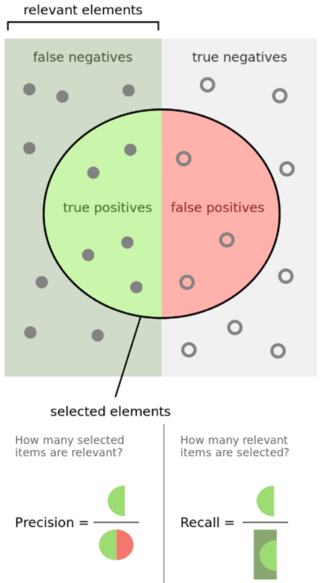

https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b

# 6. Matriz de Confusão (“Confusion Matrix”) 

Vamos agora analisar o desempenho sob a ótica da matriz de confusão (um dataset de dígitos).

A matriz de confusão é uma tabela comumente utilizada para descrever o desempenho de um modelo de classificação (ou “classificador”) para um conjunto de dados de teste para os quais se conhece os valores verdadeiros.
A matriz de confusão é dividida em vários quadrantes, sendo que cada quadrante representa uma possível classificação. No caso da regressão logística, existem apenas duas classificações possíveis: 1 ou zero.

O eixo horizontal da matriz representa as classes preditas, enquanto que o eixo vertical representa os valores efetivamente observados. Assim, para cada classe pode ocorrer:

- O algoritmo previu um resultado naquela classe, mas o valor efetivamente observado pertence à outra classe (predição equivocada);
- O algoritmo previu um resultado naquela classe, e o valor efetivamente observado pertence àquela classe (predição correta). São os elementos da diagonal principal da matriz.

Portanto, quanto mais elementos na diagonal principal, mais preciso é o modelo de classificação. Isso porque todos os acertos do modelo (previu a classificação que efetivamente se verificou) se encontram sobre a diagonal principal. Repare que isso se observa porque o eixo vertical é organizado de baixo para cima (ou seja, ele cresce em direção à parte inferior da matriz. Caso ele crescesse de cima para baixo, a diagonal secundária é que seria utilizada).

Se existem n possíveis classificações, teremos n (horizontal) x n (vertical) = n² quadrantes. Como a regressão logística possui apenas n = 2 classificações (1 ou zero), a matriz de confusão será dividida em 2 x 2 = 2² = 4 quadrantes, cada um representando uma das possíveis situações:

1.	Modelo prevê o resultado zero, e se verifica o resultado zero (previsão correta);
2.	Modelo prevê o resultado zero, mas se verifica o resultado 1 (erro do modelo);
3.	Modelo prevê o resultado 1, e se verifica o resultado 1 (previsão correta);
4.	Modelo prevê o resultado 1, mas se verifica o resultado zero (erro do modelo).

Em cada quadrante, a matriz mostra a quantidade de elementos para os quais se verificou cada uma destas situações, e impõe uma escala de cores (mapa de calor) para facilitar a visualização dos dados.

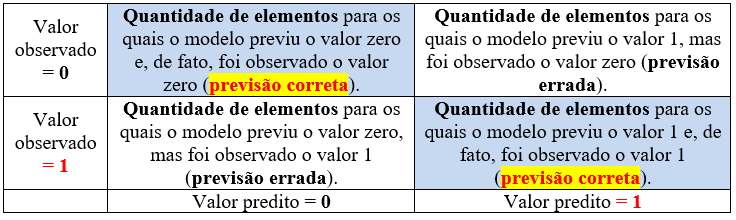

Assim, vamos calcular os valores y_pred_train que o modelo prevê para x_train e, a seguir, construir a matriz de confusão cm_train para estes dados (e faremos o mesmo para os dados de teste).

Ao construir a matriz de confusão, podemos mostrar os números das quantidades de dados em cada quadrante ou não. Para mostrar os números, mantenha annot=True. Caso não deseje vê-los, mude para annot=False. Quando muitas classes estão presentes, é interessante ocultar os números para que o gráfico não fique poluído. Como estamos lidando com apenas 2 classes, manteremos a visualização deles.


In [ ]:
cm_train = metrics.confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(9,9))
sns.heatmap(cm_train, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
#annot = True: shows the number corresponding to each square
#annot = False: do not show the number
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_train)
plt.title(all_sample_title, size = 15);

#Confusion matrix and metrics for the test

cm_test = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm_test, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
#annot = True: shows the number corresponding to each square
#annot = False: do not show the number
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_test)
plt.title(all_sample_title, size = 15);

A matriz de confusão é mostrada na janela de Plots:

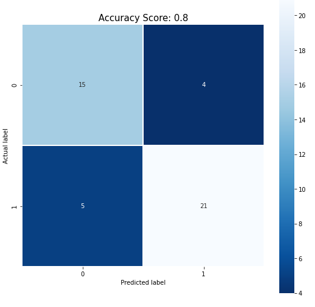

Vemos que a precisão é elevada, em 0,80 (o modelo acerta em 80% dos casos). 

1.	Em 15 ocasiões, o modelo acertou, prevendo o resultado zero (que foi efetivamente observado) – quadrante superior esquerdo (previsão = “Predicted label” = 0, valor real = “Actual label” = 0);
2.	Em 5 ocasiões, o modelo errou, pois previu zero quando o resultado era 1 – quadrante inferior esquerdo (previsão = “Predicted label” = 0, valor real = “Actual label” = 1);
3.	Em 4 ocasiões, o modelo errou, pois previu o resultado 1 quando o resultado era zero – quadrante superior direito (previsão = “Predicted label” = 1, valor real = “Actual label” = 0);
4.	Em 21 ocasiões, o modelo acertou, prevendo o resultado 1 (que foi efetivamente observado) – quadrante inferior direito (previsão = “Predicted label” = 1, valor real = “Actual label” = 1).

Veja que apenas 15 testes foram feitos, resultando na precisão de 0,60. Como a precisão dos testes é semelhante à do treino e ambas são elevadas (e os testes foram feitos com um número relativamente baixo de dados), concluímos que não há indicação de “overfitting”. No caso da matriz de confusão obtida para os dados de teste:

1.	Em 2 ocasiões, o modelo acertou, prevendo o resultado zero (que foi efetivamente observado) – quadrante superior esquerdo (previsão = “Predicted label” = 0, valor real = “Actual label” = 0);
2.	Em 3 ocasião, o modelo errou, pois previu zero quando o resultado era 1 – quadrante inferior esquerdo (previsão = “Predicted label” = 0, valor real = “Actual label” = 1);
3.	Em 2 ocasiões, o modelo errou, pois previu o resultado 1 quando o resultado era zero – quadrante superior direito (previsão = “Predicted label” = 1, valor real = “Actual label” = 0);
4.	Em 7 ocasiões, o modelo acertou, prevendo o resultado 1 (que foi efetivamente observado) – quadrante inferior direito (previsão = “Predicted label” = 1, valor real = “Actual label” = 1).

Comparando os dois relatórios, vemos um padrão interessante: as previsões que o modelo faz de que o leitor será um assinante são sensivelmente melhores que as previsões de que o leitor não fará assinatura:

Note que nos testes (relatório superior), o modelo acertou em 70% das vezes em que previu que o leitor seria um assinante; mas só acertou em 40% das vezes em que previu que o leitor não assinaria o serviço pago. Aqui fica um alerta: os dados de teste continham apenas 5 dados com leitores que não fizeram a assinatura, comprometendo a precisão para este caso (um único erro representaria 20% de falhas).

Já no treino, o modelo acertou em 84% das vezes em que previu o resultado 1; e acertou em 75% das vezes em que previu o resultado zero.

Assim, temos indícios de que o modelo fornece mais falsos negativos (prevê que uma pessoa não assinará o serviço pago, quando na verdade ela assina) do que falsos positivos (prevê que a pessoa fará a assinatura, quando na verdade ela não o faz).

É preciso levar isto em conta no momento de decidir a estratégia de marketing e vendas: sabemos que, quando o modelo prevê que um leitor se tornará assinante do serviço pago, ele geralmente acerta. Porém, ele pode estar errado ao prever que uma pessoa não fará a assinatura. Sendo assim, um escore de propensão a assinar entre 40 a 50% pode indicar, na realidade, uma pessoa propensa a realizar a assinatura (ou seja, poderia haver retorno ao jornal fornecer uma condição especial a esta pessoa, já que as que o modelo prevê que assinarão em geral o fazem naturalmente).

### 7. Gráfico da correlação logística 

Neste caso, não é possível fazer o gráfico da correlação logística que foi feito no Exercício 1.

Isto porque este gráfico só pode ser construído para a situação especial na qual existe uma única variável preditora. A presença de mais variáveis implica múltiplos eixos X – com 2 preditores, a curva seria uma superfície (não uma curva sigmoide) e, com 3 ou mais variáveis, já não há representação geométrica. No presente caso, temos 3 variáveis preditoras (seriam necessários 3 eixos X).

# 8. Considerações finais e realização de previsões

Agora você desenvolveu seu terceiro algoritmo de inteligência artificial e já está pronto para utilizá-lo para prever se o leitor se tornará ou não assinante do jornal. Lembre-se, porém, de que, como todo modelo empírico, a regressão logística só é válida para o intervalo para o qual ela foi regredida (que elencamos e discutimos antes de iniciar o Tópico 1).

Vamos supor a seguinte situação referente a uma pessoa que segue todos os requisitos para os quais o modelo foi obtido e apresenta o seguinte perfil: 

- Idade (deve ter pelo menos 18 anos): 22 anos - 'Grupo etario':1;
- Média de páginas lidas por semana (deve estar entre 1,45 a 115,74 páginas por semana): 67,21 páginas;
- Quantidade de anúncios recebidos por semana (deve estar entre 1 a 123 anúncios): 59 anúncios.

O modelo classifica esta pessoa como bom ou mau pagador? E qual o escore dela de risco de crédito? 
Primeiramente, vamos relembrar a ordem que foi definida para o dataframe X:

X = dataset[['Grupo etario', 'Média de páginas lidas por semana', 'Quantidade de anúncios recebidos por semana']]

Precisamos criar uma lista na qual os elementos sejam incluídos nesta mesma ordem. Nas linhas a seguir, criamos uma sequência de modo que basta trocar os números correspondentes a cada situação para analisar a propensão de outras pessoas a assinarem o serviço pago. Isso porque a lista é criada em termos das variáveis que armazenarão os dados da pessoa a ser analisada com o modelo. Assim, basta substituir os valores numéricos atribuídos às variáveis.

Novamente, surge o problema de a lista ser unidimensional, sendo que a regressão logística exige um array bidimensional. Por isso, usamos novamente a função np.array para corrigir o formato antes de chamar a regressão logística. Entretanto, vale notar que aqui a função é np.array(lista).reshape(1,-1), enquanto que no exercício 1, usamos o reshape(-1,1). 

O reshape (-1,1) deve ser usado para ajustar o formato de um dataframe que contém apenas uma variável preditora (coluna única X). Já o reshape (1,-1) será utilizado antes de listas contendo uma única entrada (único indivíduo para o qual desejamos prever a resposta), mas várias variáveis preditoras (várias colunas X) – ou seja, sempre que desejarmos avaliar a resposta de um único indivíduo em um modelo com várias variáveis preditoras.

In [ ]:
#ANALYSIS OF A PARTICULAR PERSON (NOT IN DATASET):
    
#ORDER OF DEFINITION OF X:
#X = dataset[['Grupo etario', 'Média de páginas lidas por semana', 'Quantidade de anúncios recebidos por semana']]
#The elements must be inserted into the list in this same order

#CHARACTERISTICS OF THE ANALYZED PERSON (just change these numbers):
#grupo 1: 18-24; gp2: 25-29; gp3: 30-39; gp4: 40-49; gp5: 50-59; gp6 = 60+
grp_etario = 1
media_paginas = 67.21
qtd_anuncios = 59

individuo_analisado = [grp_etario, media_paginas, qtd_anuncios]
#list of X - preditors    
#one-dimension array - we need a 2-dimensional

individuo_analisado = np.array(individuo_analisado).reshape(1, -1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single 
#feature (one predictor) or array.reshape(1, -1) if it contains a single sample.
#Now we are in the case of a single sample, not a single predictor

In [ ]:
# Previsão da resposta (Y =0 ou Y= 1) para o indivíduo acima

y_pred_individuo_analisado = logisticRegr.predict(individuo_analisado)
print(y_pred_individuo_analisado)

In [ ]:
#logisticRegr.coef_ : array containing the coefficients of the logit function
#(individuo_analisado) * logisticRegr.coef_: array containing the products 
#(Beta-i)Xi, where: (Beta-i) - ith coefficient of the logit, Xi - value of 
#the i-th prediction variable
#logit_x: sum of all terms of array (individuo_analisado) * logisticRegr.coef_
#with the term logisticRegr.intercept_ (intercept/Beta-0)

logit_x = np.sum(individuo_analisado * logisticRegr.coef_) + logisticRegr.intercept_

#logit = z = ln(p/(1-p)) -> exp(z) = p/(1-p) -> exp(z)-p*exp(z) = p
#p*(1+exp(z)) = exp(z) -> p = exp(z)/(1+exp(z)) = 1/(1/exp(z) + 1) = 1/(1+exp(-z))  
# expit(x) = 1/(1+exp(-x))
#Then: p = expit(z) = expit(logit)

y_prob_individuo_analisado = expit(logit_x).ravel()
print(y_prob_individuo_analisado)

# NOTA: 
utilizamos estes comandos no Template 1 para construir o gráfico da correlação. Porém, como não era efetivamente necessário, deixamos para nos debruçar sobre a lógica dos comandos neste e no próximo exercício. Isso porque entende-los é essencial para realizar predições em regressões com múltiplos preditores.

Voltando ao início da nossa análise sobre este indivíduo, gravamos e imprimimos a variável y_pred_individuo_analisado, a qual continha o resultado previsto para a regressão logística: 1 para a previsão de que a pessoa assinará o serviço pago; e zero para a predição de que a pessoa não assinará o serviço. Este será o resultado impresso na primeira linha de saída.

Por fim, gravamos e imprimimos a variável y_prob_individuo_analisado, a qual armazenou a probabilidade associada àquela pessoa (probabilidade de a pessoa assinar o serviço) pela regressão logística, valor que usamos para classificar a pessoa dentro da matriz de escore propensão a realizar a assinatura. Os resultados são mostrados no Console

# 9. Análise dos fatores mais importantes para o modelo

Vamos ampliar nossa análise com base na biblioteca Shap, que utiliza a teoria dos jogos para explicar o impacto das variáveis. Assim, a análise se torna mais refinada que a simples comparação dos parâmetros da regressão logística, e é possível realizar a avaliação simultânea de interações entre os fatores. 

Isto é particularmente importante quando temos múltiplos fatores envolvidos; ou quando as ordens de grandeza das variáveis são diferentes (imagine, por exemplo, que uma variável muito elevada pode multiplicar um fator muito baixo, de modo que o efeito se torna comparável aos demais). Este recurso também possibilita avaliarmos a importância das variáveis em modelos de redes neurais. Estes modelos possuem uma quantidade muito grande de parâmetros ajustáveis e que interagem uns com os outros, o que torna inviável a simples comparação paramétrica.

Colocamos a importação da biblioteca ao fim do código para separá-la das análises anteriores.

In [ ]:
import shap
from shap import KernelExplainer

shap.initjs()
explainer = KernelExplainer(logisticRegr.predict, X)

shap_vals = explainer.shap_values(X)
shap_df = pd.DataFrame(shap_vals)
shap.summary_plot(shap_vals, X)

"""
Note no código acima que utilizamos todo o dataframe original X das variáveis preditoras, 
antes deste ser separado em treino e teste. Geramos um conjunto de dados shap_vals e um dataframe que armazena estes dados, 
shap_df. Por fim, geramos um gráfico correspondente, o qual é mostrado abaixo:
"""

# 10. Salvar e Carregar (Futuramente) o modelo Machine Learning

A célula a seguir é utilizada para salvar o modelo aprendido, o qual poderá ser utilizado em situações futuras.
O arquivo será salvo no endereço definido em file_address:

file_address = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 1 - Regressão Logística\Save and Load ML Models\obtained_model.pmml"

file_address armazena o local em que sera salvo o modelo. Note que o arquivo gerado se chama obtained_model.pmml

O dill permite salvar em qualquer extensao (pkl, sav, pmml, ...)

Este trecho/célula pode ser aplicado a qualquer um dos modelos a serem utilizados, regressão logística, redes neurais para regressão, e redes neurais para classificação.

In [ ]:
import dill

#Definicao da pasta na qual sera salvo o arquivo:
file_address = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 1 - Regressão Logística\Save and Load ML Models\obtained_model.pmml"
#file_address armazena o local em que sera salvo o modelo
#note que o arquivo gerado se chama obtained_model.pmml
#o dill permite salvar em qualquer extensao (pkl, sav, pmml, ...)

dill.dump(logisticRegr, open(file_address, 'wb'))
#aqui, modifique logisticRegr pelo nome do modelo declarado. O logisticRegr foi
#utilizado aqui apenas para ilustrar como salvar o modelo gerado a partir de
#um comando como logisticRegr = LogisticRegression(solver = 'lbfgs')

"""
Se o modelo fosse gerado por um comando como
ann_reg = MLPRegressor(solver='adam', hidden_layer_sizes=100, activation='tanh', max_iter=20000).fit(x_train, y_train)

Então o comando utilizado para salvá-lo seria:

dill.dump(ann_reg, open(file_address, 'wb'))

Note que basta substituir o primeiro argumento, que é o nome conferido ao modelo.
"""
 
# Agora vamos carregar o modelo de ML salvo
 
# supondo que o endereco do arquivo continua o mesmo, ou seja,
# file_address = 'D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 1 - Regressão Logística\finalized_model.pmml'

loaded_model = dill.load(open(file_address, 'rb'))
#Agora o modelo carregado  recebe o nome de loaded_model

# 11. Interpretação do gráfico Shap

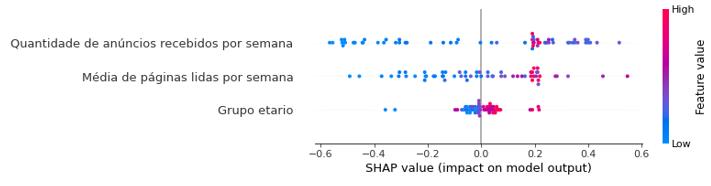

Vamos à interpretação deste gráfico. Cada linha do gráfico representa uma das variáveis preditoras do modelo. Como temos 3 variáveis preditoras, o gráfico mostra 3 linhas. As variáveis são mostradas em ordem de importância, da mais importante para a menos importante. Sendo assim, a ordem de importância é: quantidade de anúncios > média de páginas lidas > grupo etário. Note que, como há interações entre os fatores e diferentes ordens de grandeza das variáveis, ocorrem mudanças em relação à ordem dos coeficientes da regressão logística.

O impacto absoluto das variáveis é mostrado pela escala de cores: quanto mais próximo ao vermelho, mais significativa é a variável. Quanto mais azul, menos significativa ela é. Já o impacto relativo, i.e., se o efeito é positivo ou negativo, é mostrado pelo lado da barra SHAP value = 0. Valores à direita da barra representam impacto positivo, enquanto que os valores à esquerda representam impactos negativos.

##### No caso da regressão logística e dos problemas classificatórios, o impacto positivo representa uma maior probabilidade de o evento ocorrer (maior chance de ocorrer Y = 1), enquanto que o impacto negativo representa uma menor probabilidade. Sendo assim, o impacto negativo resultará em maiores chances de o indivíduo realizar a assinatura do serviço pago.

1. Quantidade de anúncios por semana: vários pontos possuem impacto elevado positivo sobre o modelo. Os pontos com impacto negativo (lado esquerdo) apresentam baixo impacto (tons azuis). Portanto, à medida que cresce o número de anúncios por semana, aumentam as chances de o indivíduo assinar o serviço pago (Y = 1).

2. Média de páginas lidas por semana: Impacto elevado positivo (vários pontos vermelhos ao lado direito). Note que a quantidade de pontos roxos do lado esquerdo (que indicariam um impacto negativo intermediário) é pequena. Assim, indivíduos que leem mais páginas por semana apresentam maior propensão a assinar o serviço pago.

3. Grupo etário: Impacto elevado positivo (vários pontos vermelhos ao lado direito), e impacto intermediário/alto negativo (pontos roxos e pontos vermelho-claros do lado esquerdo). Aqui temos a questão de que a variável foi agrupada, dificultando uma interpretação direta entre idade e impacto sobre a probabilidade. Porém, o gráfico claramente indica que não podemos desconsiderar o impacto desta variável sobre o modelo, pois ela pode tanto resultar em aumento das chances de realizar a assinatura (impacto positivo), como pode reduzir a probabilidade (impacto negativo).

Desta forma, como já havia sido analisado quando verificamos as diferenças de ordens de grandeza entre as variáveis, todas as três apresentam interações e impactos elevados sobre o resultado da probabilidade. Portanto, não se deve fazer generalizações de comportamento da variável, mas sim analisar o conjunto de variáveis que define cada indivíduo como um todo. 